In [2]:
using Plots
using LaTeXStrings
using LinearAlgebra
empty!(ARGS)
push!(ARGS, "/home/julisn/Codes/lDGA_pp_test/test_s0")
push!(ARGS, "/home/julisn/Codes/lDGA_pp_test/test_s0")

#scalefontsizes(1.8)
include("../expand_vertex_pp.jl");

  Activating project at `~/Codes/lDGAPostprocessing`
[ Info: Precompiling lDGAPostprocessing [90e5b0d8-73d4-48d2-a116-5fd8650b07f2]


opening: /home/julisn/Codes/lDGA_pp_test/test_s0/freqList.jld2
Eigenspace generated!                  
Expanding Vertex for nFermi=100, nBose=100, shift=0
Done expanding!


# Asymptotic Behavior

## $\Gamma$ 

$\Gamma^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} $

## $F$

$F^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp} + U \lambda^{\nu\omega}_d + U \lambda^{\nu'\omega}_d + U^2 \chi^{\omega}_d$

$F^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp}  + U \lambda^{\nu\omega}_m + U \lambda^{\nu'\omega}_m + U^2 \chi^{\omega}_m$

$F^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} + 2U \lambda^{\nu\omega}_{pp,s} + 2U \lambda^{\nu'\omega}_{pp,s} + 2 U^2 \chi^{\omega}_{pp,s}$


In [6]:
Γd_lim =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 
Γm_lim = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 
Γs_lim = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2;

Fd_lim =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 
Fm_lim = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 
Fs_lim = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2;

#Γm_diags = dropdims(mapslices(x->diag(x), Γm, dims=(1,2)),dims=2);
#Γd_diags = dropdims(mapslices(x->diag(x), Γd, dims=(1,2)),dims=2);
#Γs_diags = dropdims(mapslices(x->diag(x), Γs, dims=(1,2)),dims=2);

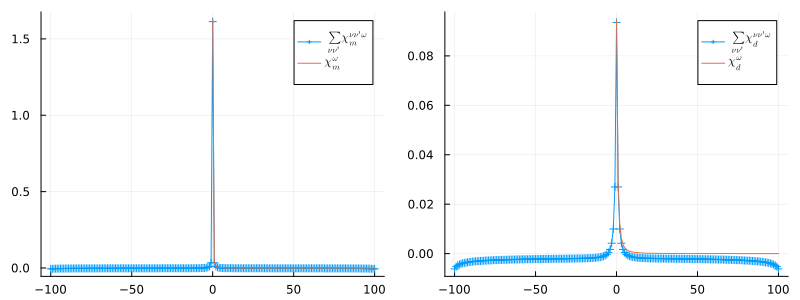

In [7]:
# Checking sign of χ^νν'ω_DMFT

χm_gen_rs = reshape(χm_gen, 2*nFermi, 2*nFermi, 2*nBose+1);
χd_gen_rs = reshape(χd_gen, 2*nFermi, 2*nFermi, 2*nBose+1);

χm = dropdims(sum(χm_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
χd = dropdims(sum(χd_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
p1 = plot(-nBose:nBose, real(χm), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_m ")
plot!(0:nBose, real(χ_m_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_m")
p2 = plot(-nBose:nBose, real(χd), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_d ")
plot!(0:nBose, real(χ_d_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_d")
plot(p1,p2, size=(800,300))

In [8]:
# - compensates global -1 factor in script

println("Γd exact ?=? border:  $(real(-Γd_lim)) ?=? $(real(Γd[1,1,1] * β^2))")
println("Γm exact ?=? border:  $(real(-Γm_lim)) ?=? $(real(Γm[1,1,1] * β^2))")
println("Γd^{-20,-50,-100} = $(-real(Γd[30,1,1])) ?=? $(U/β^2)")
println("Γm^{-20,-50,-100} = $(-real(Γm[30,1,1])) ?=? $(-U/β^2)")

Γd exact ?=? border:  -11.959588399325 ?=? -11.970542033173842
Γm exact ?=? border:  5.067049244975 ?=? 5.052930147794541
Γd^{-20,-50,-100} = 0.12353734930674859 ?=? 0.125
Γm^{-20,-50,-100} = -0.12653998099162603 ?=? -0.125


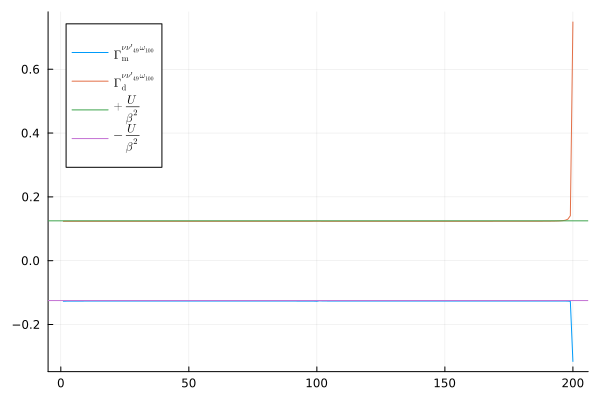

In [9]:
lim_b = U/β^2

plot(real(-Γm[:,end,end]),  label=L"\Gamma_\mathrm{m}^{\nu\nu'_{49}\omega_{100}}")
plot!(real(-Γd[:,end,end]), label=L"\Gamma_\mathrm{d}^{\nu\nu'_{49}\omega_{100}}")
hline!([ lim_b], label=L"+\frac{U}{\beta^2}")
hline!([-lim_b], label=L"-\frac{U}{\beta^2}")

# PP channel

In [10]:
Freq_to_OneToIndex = lDGAPostprocessing.Freq_to_OneToIndex



function computeΓ_pp_nb(freqList::Array, χs::Array, χt::Array, χ0::Dict{Tuple{Int,Int},Complex{Float64}}, shift, nBose::Int64, nFermi::Int64)
    Γs = fill!(Array{ComplexF64,3}(undef, 2*nFermi, 2*nFermi, 2*nBose+1), NaN)
    Γt = fill!(Array{ComplexF64,3}(undef, 2*nFermi, 2*nFermi, 2*nBose+1), NaN)
    χs = reshape(χs, 2*nFermi, 2*nFermi, 2*nBose+1)
    χt = reshape(χt, 2*nFermi, 2*nFermi, 2*nBose+1)
    # for (ωn,ω) in enumerate([0])
    ωi = nBose+1
    ωn  = 0

    nan_list       = filter(x->x[1] == x[2], findall(x-> isnan(x), χs[:,:,ωi]))
    last_nan_index = findfirst(x->x>1, diff(map(x->x[1], nan_list)))
    non_nan_slice  = (last_nan_index+1:size(χs,2)-last_nan_index+2, last_nan_index+1:size(χs,2)-last_nan_index+2,ωi)
    #Γs[non_nan_slice...] = 
    #Γt[non_nan_slice...] = 
    Γs[non_nan_slice...] = 4 .* inv(transpose(χs[non_nan_slice...]))
    Γt[non_nan_slice...] = 4 .* inv(transpose(χt[non_nan_slice...]))
    for (νi,νn) in enumerate((-nFermi:nFermi-1) .- shift*trunc(Int,ωn/2))

        Γs[νi,νi,ωi] += 2/χ0[(ωn,νn)]
        Γt[νi,νi,ωi] -= 2/χ0[(ωn,νn)]
    end
    return Γs[non_nan_slice...], Γt[non_nan_slice...]
end

function χph_to_χpp_nb(freqList::Array, χph_upup::Array, χph_updo::Array, χ0::Dict{Tuple{Int,Int},Complex{Float64}}, shift, nBose::Int, nFermi::Int)
    χpp_s = fill!(Array{eltype(χph_upup),3}(undef, 2*nFermi, 2*nFermi, 2*nBose+1), NaN)
    χpp_t = fill!(Array{eltype(χph_upup),3}(undef, 2*nFermi, 2*nFermi, 2*nBose+1), NaN)
    old_shape = size(χph_upup)
    χph_upup = reshape(χph_upup, 2*nFermi, 2*nFermi, 2*nBose+1)
    χph_updo = reshape(χph_updo, 2*nFermi, 2*nFermi, 2*nBose+1)

    for i in 1:size(freqList,1)
        ωn, νn, νpn = freqList[i]
        ωi,νi,νpi = Freq_to_OneToIndex(ωn, νn, νpn, shift, nBose, nFermi)
        ωi_ph,νi_ph,νpi_ph = Freq_to_OneToIndex(ωn - νn - νpn - 1, νn, νpn, shift, nBose, nFermi)
        if !(any((ωi,νi,νpi) .< 1) || any((ωi_ph,νi_ph,νpi_ph) .< 1) || any((ωi,νi,νpi) .> (2*nBose,2*nFermi-1,2*nFermi-1)) || any((ωi_ph,νi_ph,νpi_ph) .> (2*nBose,2*nFermi-1,2*nFermi-1)))
            χpp_s[νi,νpi,ωi] = - χ0[(ωn,νn)]*(νn==νpn) - χph_upup[νi_ph,νpi_ph,ωi_ph] + 2*χph_updo[νi_ph,νpi_ph,ωi_ph]
            χpp_t[νi,νpi,ωi] = + χ0[(ωn,νn)]*(νn==νpn) + χph_upup[νi_ph,νpi_ph,ωi_ph]
        end
    end
    χph_upup = reshape(χph_upup, old_shape)
    χph_updo = reshape(χph_updo, old_shape)
    χpp_s, χpp_t
end

χph_to_χpp_nb (generic function with 1 method)

In [11]:
χpp_s_nb, χpp_t_nb, tmp, indices_wi, indices_wn = χph_to_χpp_nb(freqList, χph_upup, χph_updo, χ0_pp_full, shift, nBose, nFermi)
χpp_ud_rs_nb = reshape(χpp_s_nb .+ χpp_t_nb,2*nFermi,2*nFermi,2*nBose+1)

nan_ind = isnan.(χpp_ud_rs_nb)
χpp_ud_rs_nb_2 = deepcopy(χpp_ud_rs_nb)
χpp_ud_rs_nb_2[nan_ind] .= 0;
χpp_ud_ω_nb  = real(sum(χpp_ud_rs_nb_2, dims=(1,2))[1,1,:])/β^2;

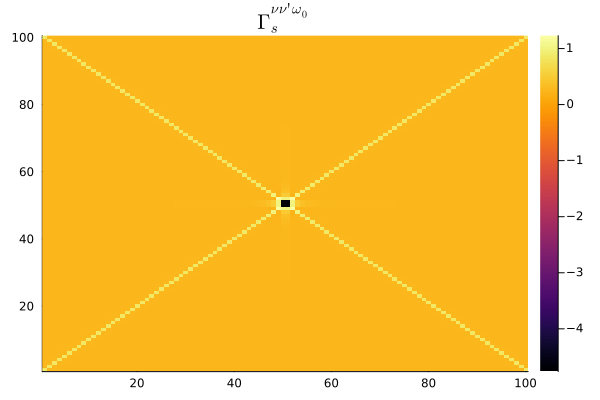

In [5]:
heatmap(real(Γs), title=L"\Gamma^{\nu\nu'\omega_0}_s")

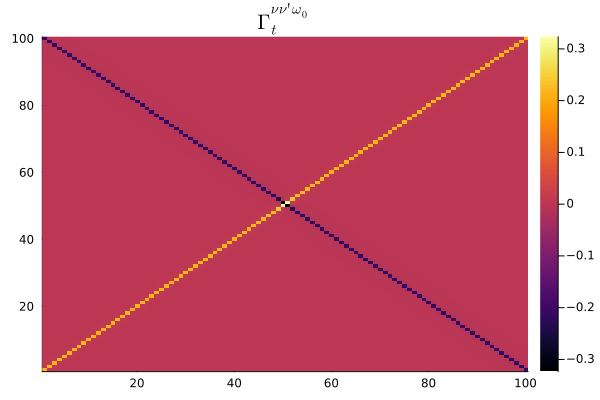

In [6]:
heatmap(real(Γt), title=L"\Gamma^{\nu\nu'\omega_0}_t")

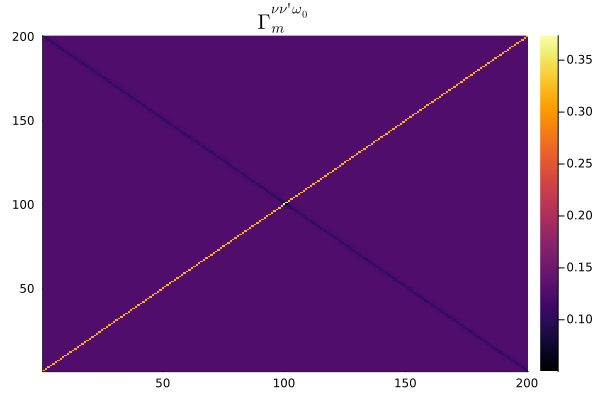

In [7]:
heatmap(real(Γm[:,:,101]), title=L"\Gamma^{\nu\nu'\omega_0}_m")

In [45]:
χpp_ud_rs = reshape(χpp_s .+ χpp_t,2*nFermi,2*nFermi,2*nBose+1)
nan_ind = isnan.(χpp_ud_rs)
χpp_ud_rs_2 = deepcopy(χpp_ud_rs)
χpp_ud_rs_2[nan_ind] .= 0;
χpp_ud_ω  = real(sum(χpp_ud_rs_2, dims=(1,2))[1,1,:])/β^2;

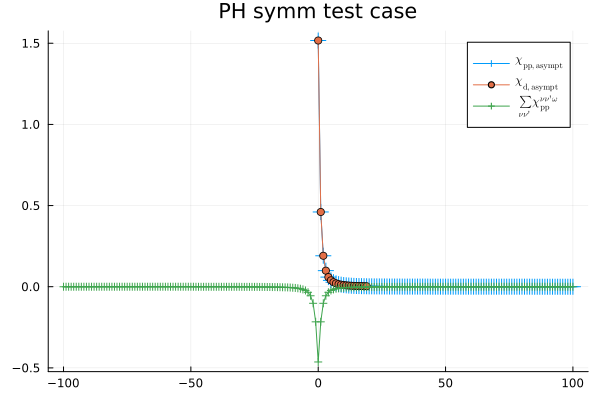

In [49]:
#p
plot(0:nBose, real.(χ_pp_asympt[1:nBose+1]), markershape=:auto, markersize=8, label=L"\chi_\mathrm{pp,asympt}", title="PH symm test case")
#plot!(-nBose:nBose, -3.28 .* χpp_ud_ω, markershape=:auto, markersize=9, label="int")
plot!(0:19, real(χ_d_asympt[1:20]), label=L"\chi_\mathrm{d,asympt}", markershape=:auto)
plot!(-nBose:nBose, χpp_ud_ω_nb, markershape=:auto, label=L"\sum_{\nu\nu'}\chi^{\nu\nu'\omega}_\mathrm{pp}")